In [46]:
import numpy as np
import pandas as pd
weather=pd.read_csv("testset.csv")
weather.columns=['datetime_utc','_conds','_dewptm','_fog','_hail','_heatindexm','_hum','_precipm','_pressurem','_rain','_snow','_tempm','a','b','c','d','e','f','g','h']
weather.head()


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,a,b,c,d,e,f,g,h
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
columns=['datetime_utc','_conds','_hail','_heatindexm','_snow','a','b','c','d','e','f','g','h']
weather=weather.drop(columns,axis=0)
weather.head()

,_dewptm,_fog,_hum,_precipm,_pressurem,_rain,_tempm
0,9.0,0,27.0,NaN,1010.0,0,30.0
1,10.0,0,32.0,NaN,-9999.0,0,28.0
2,11.0,0,44.0,NaN,-9999.0,0,24.0
3,10.0,0,41.0,NaN,1010.0,0,24.0
4,11.0,0,47.0,NaN,1011.0,0,23.0


In [5]:
weather=weather.fillna(0)
weather.head()

,_dewptm,_fog,_hum,_precipm,_pressurem,_rain,_tempm
0,9.0,0,27.0,0.0,1010.0,0,30.0
1,10.0,0,32.0,0.0,-9999.0,0,28.0
2,11.0,0,44.0,0.0,-9999.0,0,24.0
3,10.0,0,41.0,0.0,1010.0,0,24.0
4,11.0,0,47.0,0.0,1011.0,0,23.0


In [31]:
from sklearn.model_selection import train_test_split
cols=['_dewptm','_hum','_pressurem','_rain']
data=weather[cols]
target=weather['_tempm']
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
print(kn.score(x_test,y_test))

0.7182747148288974


In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
clf=DecisionTreeClassifier()
dtree= clf.fit(x_train,y_train) 
y_pred=dtree.predict(x_test);
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7916666666666666


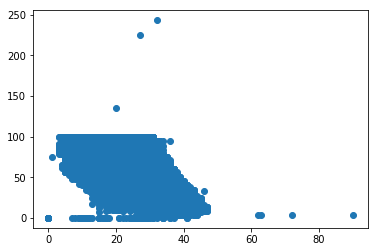

In [19]:
from matplotlib import pyplot as pt
humidity=weather['_hum']
pt.scatter((target),(humidity))
pt.show()

In [16]:
weather.describe()

,_dewptm,_fog,_hum,_precipm,_pressurem,_rain,_tempm
count,100990.00000,100990.000000,100990.000000,100990.0,1.009900e+05,100990.000000,100990.000000
mean,15.64441,0.069690,57.475404,0.0,1.927892e+03,0.026260,25.281662
std,7.14364,0.254625,24.238610,0.0,3.180127e+05,0.159908,8.704446
min,-24.00000,0.000000,0.000000,0.0,-9.999000e+03,0.000000,0.000000
25%,10.00000,0.000000,38.000000,0.0,1.002000e+03,0.000000,19.000000
50%,15.00000,0.000000,58.000000,0.0,1.008000e+03,0.000000,27.000000
75%,22.00000,0.000000,77.000000,0.0,1.014000e+03,0.000000,32.000000
max,75.00000,1.000000,243.000000,0.0,1.010614e+08,1.000000,90.000000


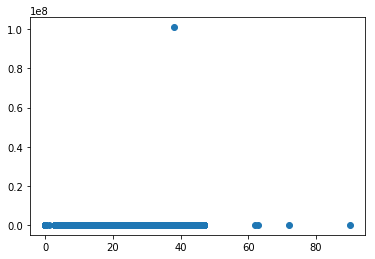

In [20]:
from matplotlib import pyplot as pt
pressure=weather['_pressurem']
pt.scatter((target),(pressure))
pt.show()

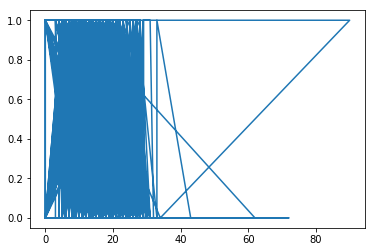

In [29]:
from matplotlib import pyplot as pt
fog=weather['_fog']
pt.plot((target),(fog))
pt.show()

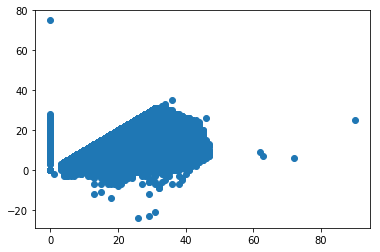

In [30]:
from matplotlib import pyplot as pt
dew=weather['_dewptm']
pt.scatter((target),(dew))
pt.show()

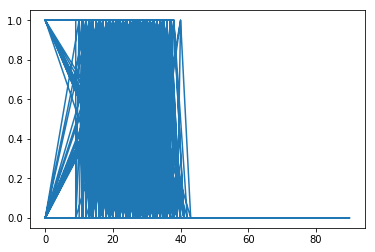

In [27]:
from matplotlib import pyplot as pt
rain=weather['_rain']
pt.plot((target),(rain))
pt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.8264570831441794


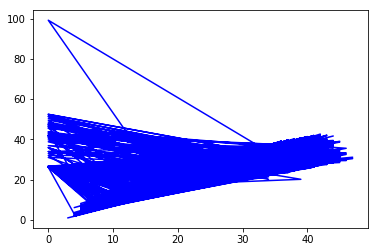

In [43]:
from matplotlib import pyplot as pt
pt.plot(y_test, lr.predict(x_test), color = 'blue')
pt.show()

In [37]:
target.describe()

count    100990.000000
mean         25.281662
std           8.704446
min           0.000000
25%          19.000000
50%          27.000000
75%          32.000000
max          90.000000
Name: _tempm, dtype: float64